In [65]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


In [2]:
df=pd.read_csv("drinking_water_potability.csv")

In [3]:
df

ph    Hardness       Solids  Chloramines     Sulfate  \
0          NaN  204.890456  20791.31898     7.300212  368.516441   
1     3.716080  129.422921  18630.05786     6.635246         NaN   
2     8.099124  224.236259  19909.54173     9.275884         NaN   
3     8.316766  214.373394  22018.41744     8.059332  356.886136   
4     9.092223  181.101509  17978.98634     6.546600  310.135738   
...        ...         ...          ...          ...         ...   
3271  4.668102  193.681736  47580.99160     7.166639  359.948574   
3272  7.808856  193.553212  17329.80216     8.061362         NaN   
3273  9.419510  175.762646  33155.57822     7.350233         NaN   
3274  5.126763  230.603758  11983.86938     6.303357         NaN   
3275  7.874671  195.102299  17404.17706     7.509306         NaN   

      Conductivity  Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       564.308654       10.379783        86.990970   2.963135           0  
1       592.885359       15.180013        56.329076   4.500656           0  
2       418.606213       16.868637        66.420093   3.055934           0  
3       363.266516       18.436525       100.341674   4.628771           0  
4       398.410813       11.558279        31.997993   4.075075           0  
...            ...             ...              ...        ...         ...  
3271    526.424171       13.894419        66.687695   4.435821           1  
3272    392.449580       19.903225              NaN   2.798243           1  
3273    432.044783       11.039070        69.845400   3.298875           1  
3274    402.883113       11.168946        77.488213   4.708658           1  
3275    327.459761       16.140368        78.698446   2.309149           1  

[3276 rows x 10 columns]

In [4]:
df.column

AttributeError: 'DataFrame' object has no attribute 'column'

In [5]:
df.column()

AttributeError: 'DataFrame' object has no attribute 'column'

In [6]:
df.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

In [7]:
df.describe

<bound method NDFrame.describe of             ph    Hardness       Solids  Chloramines     Sulfate  \
0          NaN  204.890456  20791.31898     7.300212  368.516441   
1     3.716080  129.422921  18630.05786     6.635246         NaN   
2     8.099124  224.236259  19909.54173     9.275884         NaN   
3     8.316766  214.373394  22018.41744     8.059332  356.886136   
4     9.092223  181.101509  17978.98634     6.546600  310.135738   
...        ...         ...          ...          ...         ...   
3271  4.668102  193.681736  47580.99160     7.166639  359.948574   
3272  7.808856  193.553212  17329.80216     8.061362         NaN   
3273  9.419510  175.762646  33155.57822     7.350233         NaN   
3274  5.126763  230.603758  11983.86938     6.303357         NaN   
3275  7.874671  195.102299  17404.17706     7.509306         NaN   

      Conductivity  Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       564.308654       10.379783        86.990970   2.963135          

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [9]:
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [10]:
sns.heatmap(df.isnull)

ValueError: Must pass 2-d input. shape=()

<AxesSubplot:>

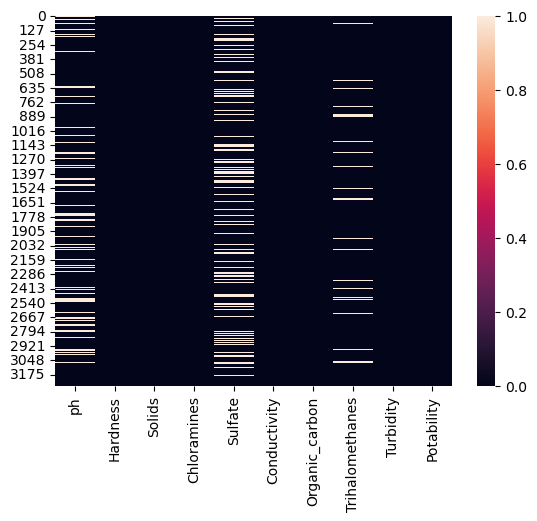

In [11]:
sns.heatmap(df.isnull())

In [12]:
df.corr

<bound method DataFrame.corr of             ph    Hardness       Solids  Chloramines     Sulfate  \
0          NaN  204.890456  20791.31898     7.300212  368.516441   
1     3.716080  129.422921  18630.05786     6.635246         NaN   
2     8.099124  224.236259  19909.54173     9.275884         NaN   
3     8.316766  214.373394  22018.41744     8.059332  356.886136   
4     9.092223  181.101509  17978.98634     6.546600  310.135738   
...        ...         ...          ...          ...         ...   
3271  4.668102  193.681736  47580.99160     7.166639  359.948574   
3272  7.808856  193.553212  17329.80216     8.061362         NaN   
3273  9.419510  175.762646  33155.57822     7.350233         NaN   
3274  5.126763  230.603758  11983.86938     6.303357         NaN   
3275  7.874671  195.102299  17404.17706     7.509306         NaN   

      Conductivity  Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       564.308654       10.379783        86.990970   2.963135           0

In [13]:
plt.figure(figsize=(12,8))
sns.heatmapp(df.corr(),annot=True)

AttributeError: module 'seaborn' has no attribute 'heatmapp'

<Figure size 1200x800 with 0 Axes>

<AxesSubplot:>

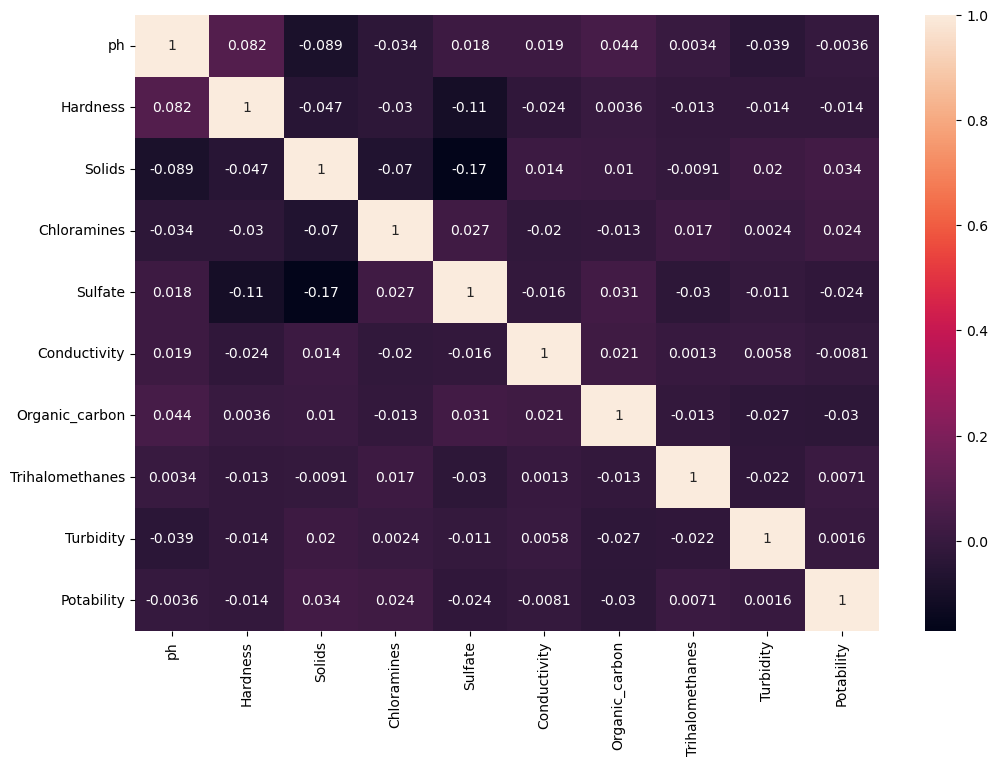

In [14]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True)

<AxesSubplot:xlabel='Potability', ylabel='count'>

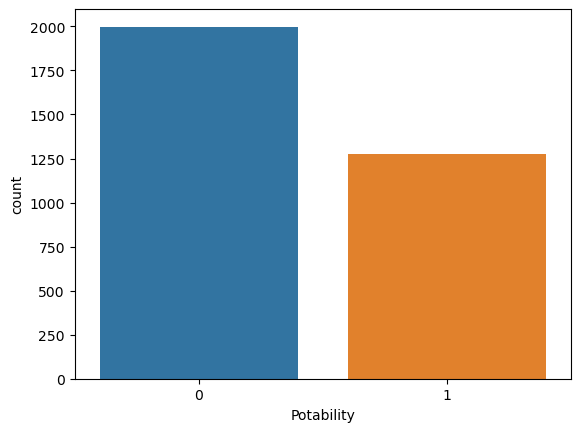

In [16]:
sns.countplot(x="Potability",data=df)

In [17]:
 df["Potability"].value_counts()

0    1998
1    1278
Name: Potability, dtype: int64

AttributeError: 'numpy.ndarray' object has no attribute 'latten'

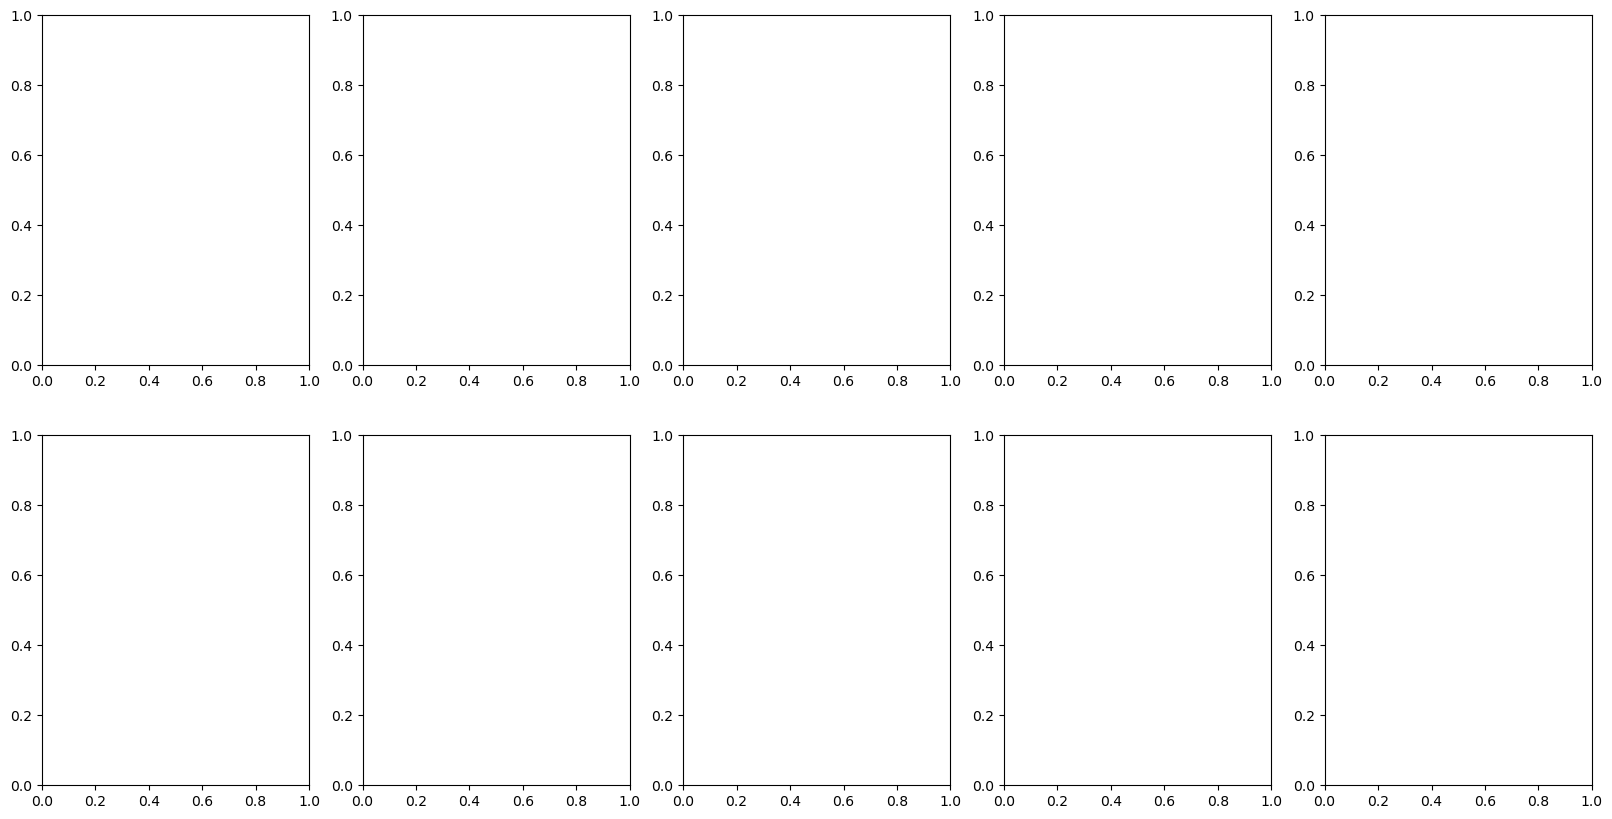

In [18]:
#visualization dataset and checking for outliers
fig,ax=plt.subplots(ncols=5,nrows=2,figsize=(20,10 ))
ax= ax.atten()

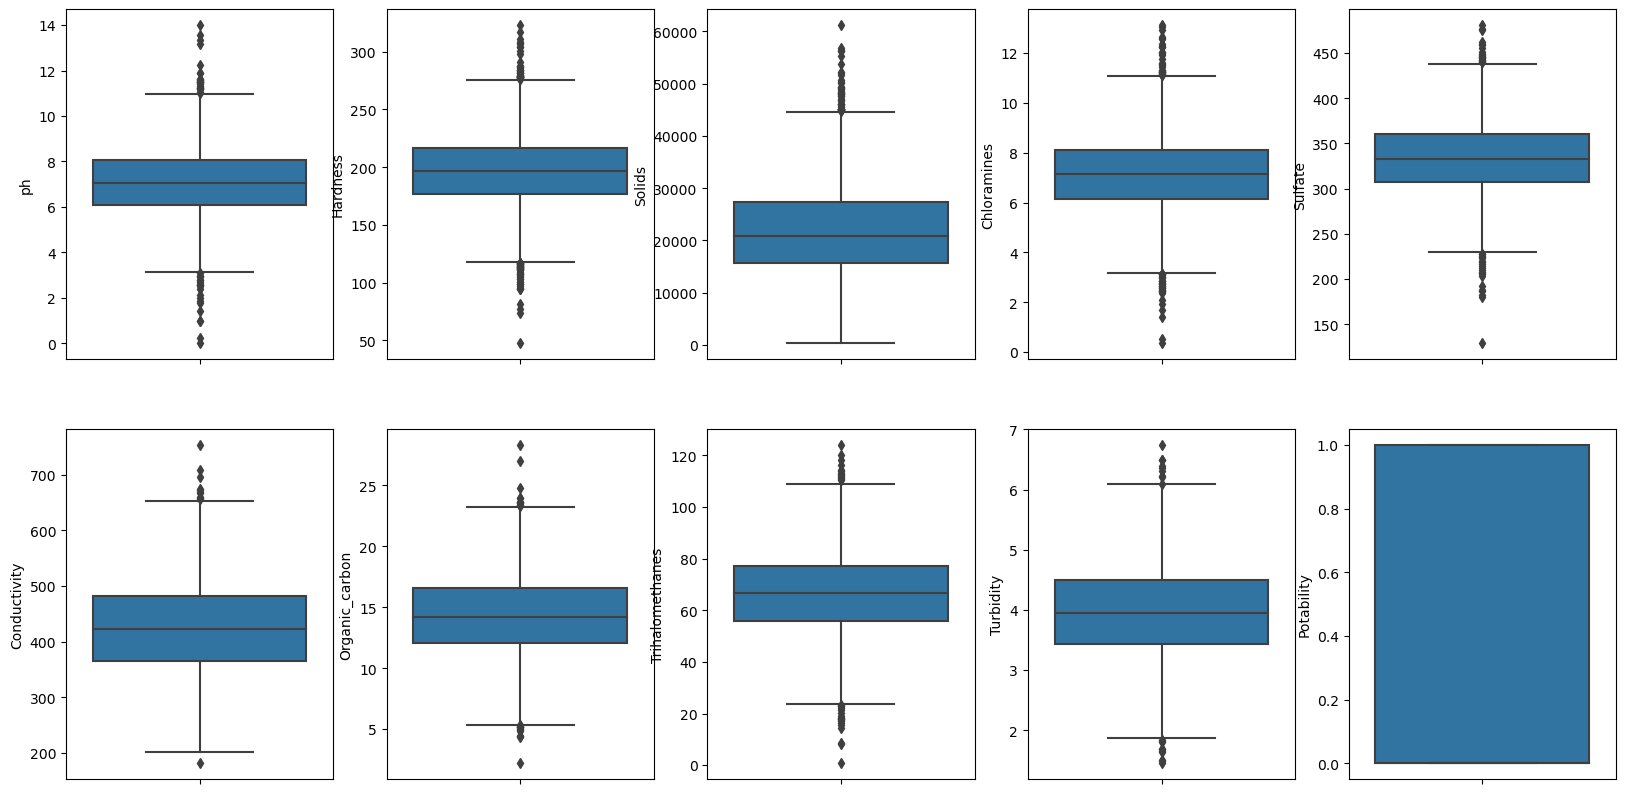

In [23]:
#visualization dataset and checking for outliers
fig,ax=plt.subplots(ncols=5,nrows=2,figsize=(20,10 ))
ax= ax.flatten()
index=0
for col,values in df.items():
    sns.boxplot(y=col,data=df,ax=ax[index])
    index+=1

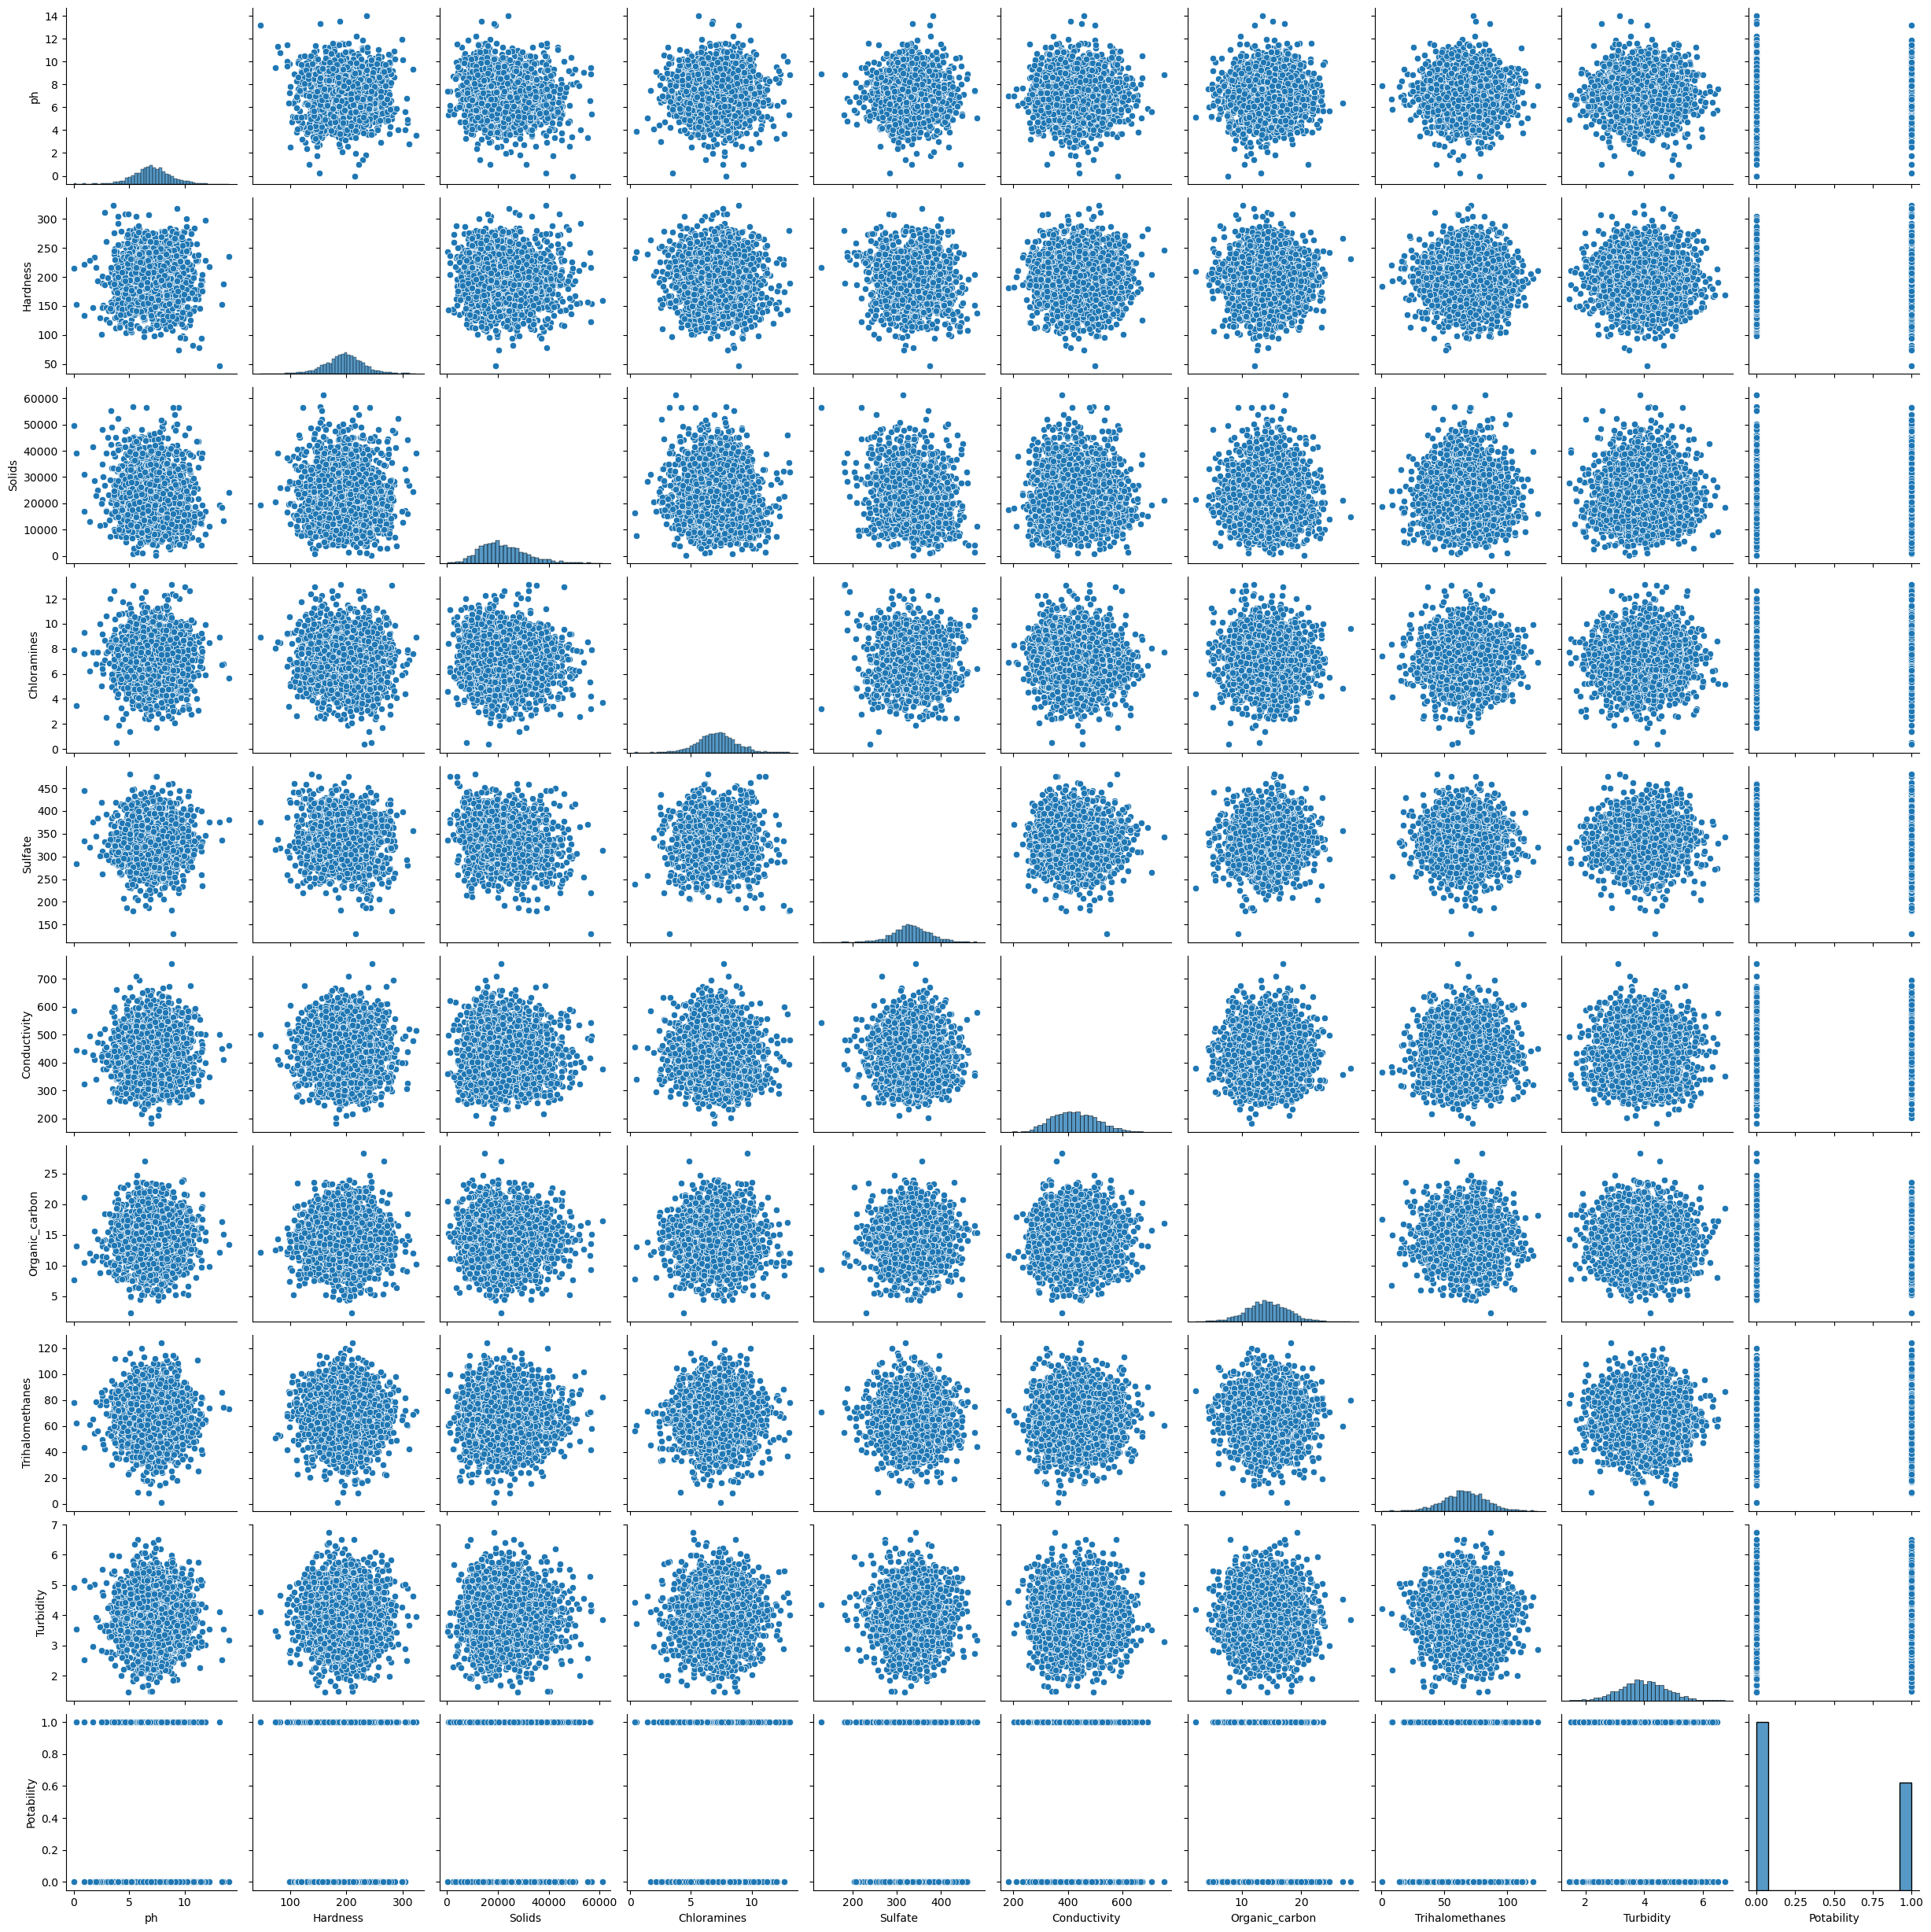

In [24]:
sns.pairplot(df)

In [30]:
fig= px.pie(df,names ='Potability', hole =0.4,template="plotly_dark")
fig.show()

In [33]:
fig=px.scatter(df,x="ph",y="sulate",templates="plotly_dark")
fig.show()

TypeError: scatter() got an unexpected keyword argument 'templates'

In [35]:
fig=px.scatter(df,x="ph",y="sulfate",template="plotly_dark")
fig.show()

ValueError: Value of 'y' is not the name of a column in 'data_frame'. Expected one of ['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'] but received: sulfate

In [37]:
fig=px.scatter(df,x="ph",y="Sulate",template="plotly_dark")
fig.show()

ValueError: Value of 'y' is not the name of a column in 'data_frame'. Expected one of ['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'] but received: Sulate

In [38]:
fig=px.scatter(df,x="ph",y="Sulfate",template="plotly_dark")
fig.show()

In [39]:
fig=px.scatter(df,x="ph",y="Sulfate",color="Potability",template="plotly_dark")
fig.show()

In [42]:
fig=px.scatter(df,x="Organic_carbon",y="Hardness",color="Potability",template="plotly_dark")
fig.show()  

Text(0, 0.5, 'Percentage of Missing Values')

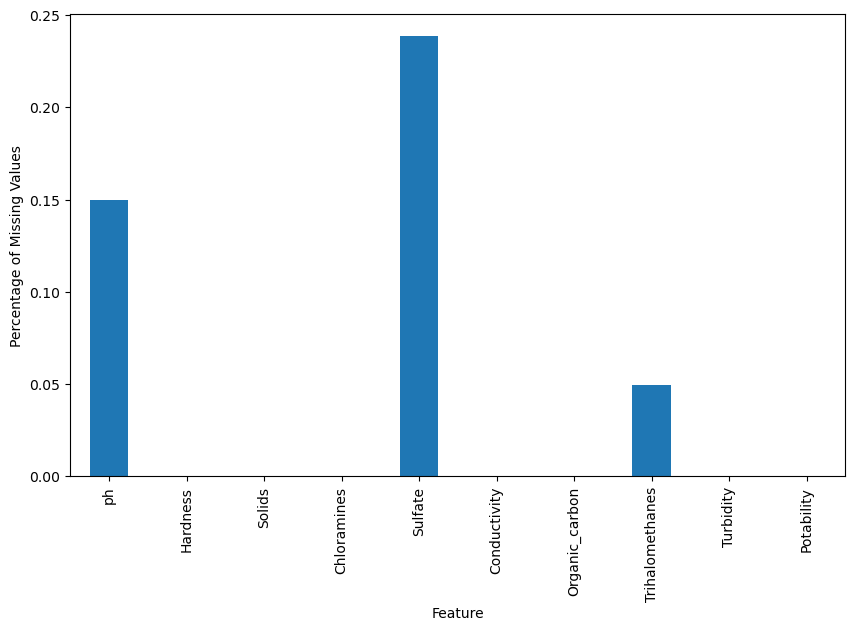

In [45]:
df.isnull().mean().plot.bar(figsize=(10,6))
plt.xlabel("Feature")
plt.ylabel("Percentage of Missing Values")

In [46]:
df["ph"]= df["ph"].fillna(df["ph"].mean())
df["Sulfate"]= df["Sulfate"].fillna(df["Sulfate"].mean())
df["Trihalomethanes"]= df["Trihalomethanes"].fillna(df["Trihalomethanes"].mean())

In [47]:
df.isnull()

ph  Hardness  Solids  Chloramines  Sulfate  Conductivity  \
0     False     False   False        False    False         False   
1     False     False   False        False    False         False   
2     False     False   False        False    False         False   
3     False     False   False        False    False         False   
4     False     False   False        False    False         False   
...     ...       ...     ...          ...      ...           ...   
3271  False     False   False        False    False         False   
3272  False     False   False        False    False         False   
3273  False     False   False        False    False         False   
3274  False     False   False        False    False         False   
3275  False     False   False        False    False         False   

      Organic_carbon  Trihalomethanes  Turbidity  Potability  
0              False            False      False       False  
1              False            False      False       False  
2              False            False      False       False  
3              False            False      False       False  
4              False            False      False       False  
...              ...              ...        ...         ...  
3271           False            False      False       False  
3272           False            False      False       False  
3273           False            False      False       False  
3274           False            False      False       False  
3275           False            False      False       False  

[3276 rows x 10 columns]

In [48]:
df.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

<AxesSubplot:>

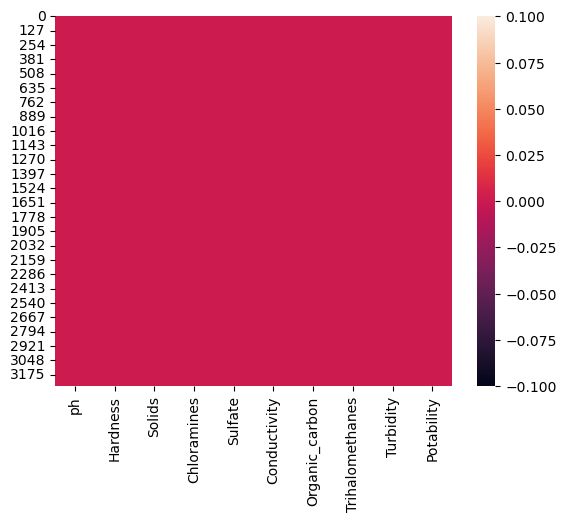

In [49]:
sns.heatmap(df.isnull())

In [50]:
df.head()

ph    Hardness       Solids  Chloramines     Sulfate  Conductivity  \
0  7.080795  204.890456  20791.31898     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.05786     6.635246  333.775777    592.885359   
2  8.099124  224.236259  19909.54173     9.275884  333.775777    418.606213   
3  8.316766  214.373394  22018.41744     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.98634     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783        86.990970   2.963135           0  
1       15.180013        56.329076   4.500656           0  
2       16.868637        66.420093   3.055934           0  
3       18.436525       100.341674   4.628771           0  
4       11.558279        31.997993   4.075075           0

In [51]:
df.tail()

ph    Hardness       Solids  Chloramines     Sulfate  \
3271  4.668102  193.681736  47580.99160     7.166639  359.948574   
3272  7.808856  193.553212  17329.80216     8.061362  333.775777   
3273  9.419510  175.762646  33155.57822     7.350233  333.775777   
3274  5.126763  230.603758  11983.86938     6.303357  333.775777   
3275  7.874671  195.102299  17404.17706     7.509306  333.775777   

      Conductivity  Organic_carbon  Trihalomethanes  Turbidity  Potability  
3271    526.424171       13.894419        66.687695   4.435821           1  
3272    392.449580       19.903225        66.396293   2.798243           1  
3273    432.044783       11.039070        69.845400   3.298875           1  
3274    402.883113       11.168946        77.488213   4.708658           1  
3275    327.459761       16.140368        78.698446   2.309149           1

In [54]:
x=df.drop("Potability",axis=1)
y=df["Potability"]


In [55]:
x.shape ,y.shape

((3276, 9), (3276,))

In [58]:
scaler=StandardScaler()
x= scaler.fit_transform(x)
x

array([[-1.02733269e-14,  2.59194712e-01, -1.39470871e-01, ...,
        -1.18065057e+00,  1.30614943e+00, -1.28629758e+00],
       [-2.28933938e+00, -2.03641367e+00, -3.85986649e-01, ...,
         2.70597241e-01, -6.38479983e-01,  6.84217891e-01],
       [ 6.92867789e-01,  8.47664833e-01, -2.40047337e-01, ...,
         7.81116858e-01,  1.50940874e-03, -1.16736546e+00],
       ...,
       [ 1.59125368e+00, -6.26829230e-01,  1.27080989e+00, ...,
        -9.81329233e-01,  2.18748247e-01, -8.56006782e-01],
       [-1.32951593e+00,  1.04135450e+00, -1.14405809e+00, ...,
        -9.42063817e-01,  7.03468419e-01,  9.50797384e-01],
       [ 5.40150905e-01, -3.85462306e-02, -5.25811938e-01, ...,
         5.60940071e-01,  7.80223466e-01, -2.12445866e+00]])

In [61]:
scaler=StandardScaler()
x=scaler.fit_transform(x)
x

array([[-9.76037400e-15,  2.59194712e-01, -1.39470871e-01, ...,
        -1.18065057e+00,  1.30614943e+00, -1.28629758e+00],
       [-2.28933938e+00, -2.03641367e+00, -3.85986649e-01, ...,
         2.70597241e-01, -6.38479983e-01,  6.84217891e-01],
       [ 6.92867789e-01,  8.47664833e-01, -2.40047337e-01, ...,
         7.81116858e-01,  1.50940874e-03, -1.16736546e+00],
       ...,
       [ 1.59125368e+00, -6.26829230e-01,  1.27080989e+00, ...,
        -9.81329233e-01,  2.18748247e-01, -8.56006782e-01],
       [-1.32951593e+00,  1.04135450e+00, -1.14405809e+00, ...,
        -9.42063817e-01,  7.03468419e-01,  9.50797384e-01],
       [ 5.40150905e-01, -3.85462306e-02, -5.25811938e-01, ...,
         5.60940071e-01,  7.80223466e-01, -2.12445866e+00]])

In [68]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [69]:
x_train.shape ,x_test.shape

((2620, 9), (656, 9))

LOGISTIC REGRESSION 

In [ ]:
from sklearn.linear_model import My a messa mess